Cargando datos para la estación: Invierno 2 (Soles 1183-1336)...
Datos cargados con éxito: 3497437 mediciones.
Datos listos para graficar.
Generando el gráfico y guardando en 'grafico_01_temperatura_invierno_2.png'...


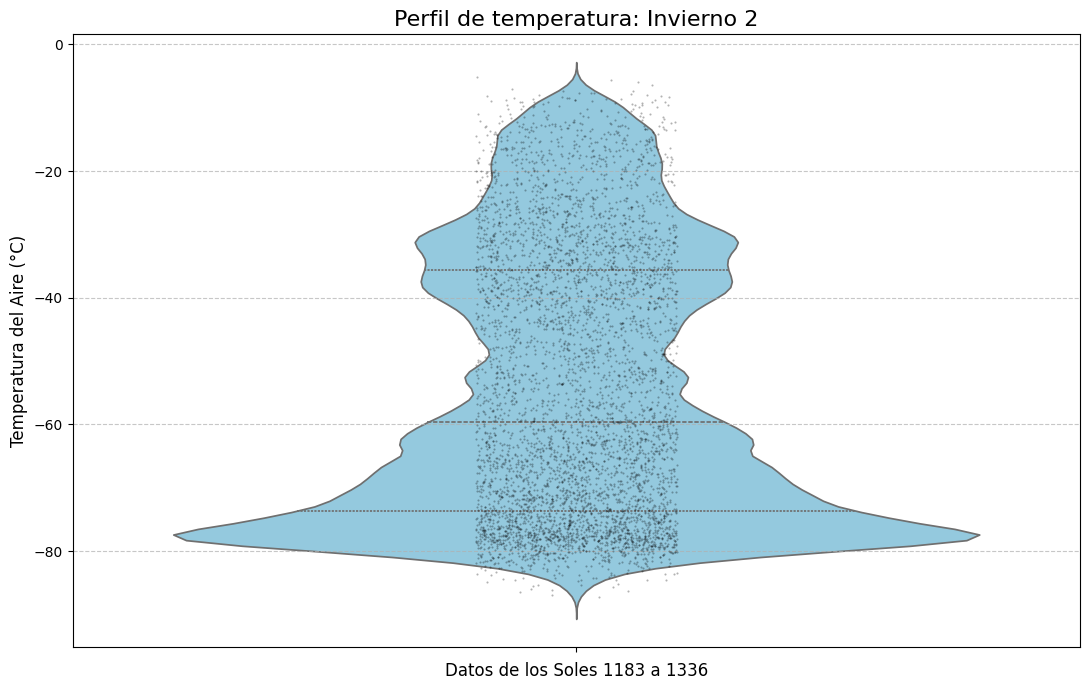

Proceso finalizado. El gráfico fue guardado en 'grafico_01_temperatura_invierno_2.png'.


In [3]:
# -*- coding: utf-8 -*-
"""
PLANTILLA ESTÁNDAR APLICADA:
Análisis detallado de la distribución de temperatura para una estación marciana específica
utilizando un gráfico de violín y un strip plot.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN DEL GRÁFICO Y ANÁLISIS ---

# Parámetros del gráfico
TAMAÑO_FIGURA = (11, 7)
RESOLUCION_DPI = 300
NOMBRE_ARCHIVO_SALIDA = "grafico_01_temperatura_invierno_2.png"

# Parámetros del análisis
ARCHIVO_CALIBRADO = 'dataset_meda_calibrated_data.parquet'
NOMBRE_ESTACION = "Invierno 2"
SOL_INICIO = 1183
SOL_FIN = 1336

# --- 2. CARGA Y PREPARACIÓN DE DATOS ---
print(f"Cargando datos para la estación: {NOMBRE_ESTACION} (Soles {SOL_INICIO}-{SOL_FIN})...")
try:
    df_estacion = pd.read_parquet(
        ARCHIVO_CALIBRADO,
        engine='pyarrow',
        filters=[('sol', '>=', SOL_INICIO), ('sol', '<=', SOL_FIN)]
    )
    print(f"Datos cargados con éxito: {len(df_estacion)} mediciones.")

    # Convertimos Kelvin a Celsius
    df_estacion['ATS_LOCAL_TEMP1_C'] = df_estacion['ATS_LOCAL_TEMP1'] - 273.15
    
    # Tomamos una muestra para los puntos del strip plot
    df_muestra_puntos = df_estacion.sample(n=min(len(df_estacion), 5000), random_state=42)
    print("Datos listos para graficar.")

# --- 3. CREACIÓN DEL GRÁFICO ---
    if not df_estacion.empty:
        print(f"Generando el gráfico y guardando en '{NOMBRE_ARCHIVO_SALIDA}'...")
        plt.figure(figsize=TAMAÑO_FIGURA)
        
        # Creamos el gráfico de violín con TODOS los datos de la estación.
        sns.violinplot(data=df_estacion, y='ATS_LOCAL_TEMP1_C', color='skyblue', inner='quartile')
        
        # Superponemos una muestra de puntos individuales para ver la dispersión.
        sns.stripplot(data=df_muestra_puntos, y='ATS_LOCAL_TEMP1_C', color='black', size=1.5, alpha=0.3)
        
        # Estilo y Títulos
        plt.title(f'Perfil de temperatura: {NOMBRE_ESTACION}', fontsize=16)
        plt.xlabel(f'Datos de los Soles {SOL_INICIO} a {SOL_FIN}', fontsize=12)
        plt.ylabel('Temperatura del Aire (°C)', fontsize=12)
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

# --- 4. GUARDADO Y VISUALIZACIÓN ---
        plt.savefig(NOMBRE_ARCHIVO_SALIDA, dpi=RESOLUCION_DPI, bbox_inches='tight')
        plt.show()
        
        print(f"Proceso finalizado. El gráfico fue guardado en '{NOMBRE_ARCHIVO_SALIDA}'.")
    else:
        print("No se encontraron datos para el rango de soles especificado.")

except Exception as e:
    print(f"Ocurrió un error: {e}")